In [10]:
#Thommy, John, Kevin, Christopher

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Reads dataset, drops useless features, shows dataset with dropped features
df = pd.read_csv('ye.csv')
A = df.drop(columns=['/developers','/discount','/gfq_difficulty_comment','/gfq_length_comment','/gfq_rating_comment','/gfq_url','/hltb_url','/igdb_url','/image','/meta_url','/platforms','/published_hltb','/published_igdb','/published_meta','/published_store','/published_stsp','/publishers','/sid','/store_promo_url','/tags','/voiceovers'])
A

C:\Users\Thommy\AppData\Local\Temp\ipykernel_15396\969955783.py:12: DtypeWarning: Columns (9,10,12,14,15,24,33,34,36,39,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ye.csv')


,/name,/achievements,/categories,/current_price,/description,/full_price,/genres,/gfq_difficulty,/gfq_length,/gfq_rating,...,/igdb_popularity,/igdb_score,/igdb_single,/igdb_uscore,/languages,/meta_score,/meta_uscore,/store_uscore,/stsp_mdntime,/stsp_owners
0,Counter-Strike,0,"Multi-player,PvP,Online PvP,Shared/Split Scree...",999,Play the world's number 1 online action game. ...,999,Action,Just Right-Tough,64.5,3.90,...,25.74,70,0,83,"English,French,German,Italian,Spanish - Spain,...",88,92,97,200,15000000
1,Team Fortress Classic,0,"Multi-player,PvP,Online PvP,Shared/Split Scree...",499,One of the most popular online action games of...,499,Action,Just Right-Tough,50.6,3.47,...,1.67,0,0,70,"English,French,German,Italian,Spanish - Spain,...",0,71,84,20,3500000
2,Day of Defeat,0,"Multi-player,Valve Anti-Cheat enabled",499,Enlist in an intense brand of Axis vs. Allied ...,499,Action,Just Right-Tough,53.1,3.69,...,1.45,71,0,76,"English,French,German,Italian,Spanish - Spain",79,91,90,28,7500000
3,Deathmatch Classic,0,"Multi-player,PvP,Online PvP,Shared/Split Scree...",499,Enjoy fast-paced multiplayer gaming with Death...,499,Action,Just Right-Tough,2.9,3.15,...,1.00,0,0,75,"English,French,German,Italian,Spanish - Spain,...",0,68,82,11,7500000
4,Half-Life: Opposing Force,0,"Single-player,Multi-player,Valve Anti-Cheat en...",499,Return to the Black Mesa Research Facility as ...,499,Action,Just Right,10.7,3.88,...,3.45,70,6,82,"English,French,German,Korean",0,86,95,235,7500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53976,Kuggs,0,Single-player,199,Kuggs is a fast-paced shooter with some light ...,199,Adventure,NaN,0.0,0.00,...,0.00,0,0,0,English,0,0,0,0,0
53977,Whispered Secrets: Tying the Knot Collector's ...,0,Single-player,1259,Grandma Studios invites you on the latest chil...,1399,"Adventure,Casual",NaN,0.0,0.00,...,0.00,0,0,0,English,0,0,0,0,0
53978,Grey Eyes of Death,30,"Single-player,Steam Achievements,Steam Cloud",401,Embark on a deadly journey for survival. Your ...,599,"Adventure,Indie,RPG",NaN,0.0,0.00,...,0.00,0,0,0,English,0,0,0,0,0
53979,Memory Puzzle - Futanari Threesome,3,"Single-player,Steam Achievements,Steam Leaderb...",119,"Train your brain with this memory game, reveal...",199,"Casual,Indie",NaN,0.0,0.00,...,0.00,0,0,0,English,0,0,0,0,0


In [11]:
A.describe()
A.to_csv('ye_1.csv', index = False)
Z = A.drop(columns =['/language','/meta_score'])


PermissionError: [Errno 13] Permission denied: 'ye_1.csv'

In [9]:
daf = pd.read_csv('ye_1.csv')
difficulty = daf['/gfq_difficulty'].unique()
print(difficulty)
daf['/gfq_difficulty'] = daf['/gfq_difficulty'].fillna('nan')


difficulty_map = {
    'nan': np.nan,
    'Simple': 0,
    'Simple-Easy': 1,
    'Easy': 2,
    'Easy-Just Right': 3,
    'Just Right': 4,
    'Just Right-Tough': 5,
    'Tough': 6,
    'Tough-Unforgiving': 7,
    'Unforgiving': 8
}


daf['/gfq_difficulty'] = daf['/gfq_difficulty'].map(difficulty_map)
#count: 12355
#mean: 4.119547
#std: 1.664571
#median: 4
daf['/gfq_difficulty'] = daf['/gfq_difficulty'].fillna(4)
print(daf['/gfq_difficulty'])

daf['/gfq_difficulty'].describe()

daf.to_csv('Encoded diff.csv', index = False)


['Just Right-Tough' 'Just Right' 'Easy-Just Right' 'Tough' nan
 'Tough-Unforgiving' 'Unforgiving' 'Easy' 'Simple' 'Simple-Easy']
0        5.0
1        5.0
2        5.0
3        5.0
4        4.0
        ... 
53976    4.0
53977    4.0
53978    4.0
53979    4.0
53980    4.0
Name: /gfq_difficulty, Length: 53981, dtype: float64


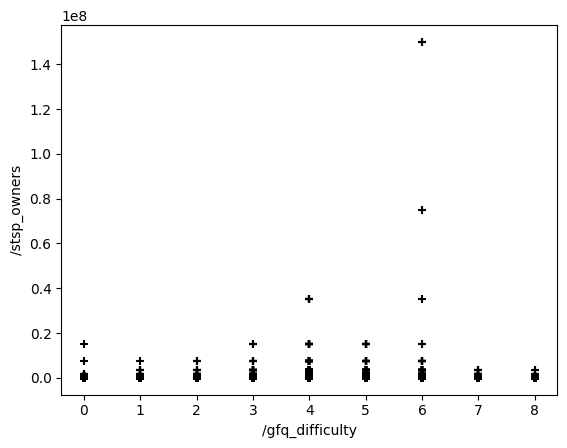

In [4]:
%matplotlib inline
X = daf['/gfq_difficulty']
y = daf['/stsp_owners']
plt.xlabel('/gfq_difficulty')
plt.ylabel('/stsp_owners')
plt.scatter(X,y, color='black', marker = '+')

In [5]:
#Dummy Regressor
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
dummy = DummyRegressor(strategy ='mean')
dummy.fit(X_train, y_train)

y_pred_train = dummy.predict(X_train)

rmse_train = mean_squared_error(y_train, y_pred_train, squared = False)

y_pred_test = dummy.predict(X_test)

rmse_test = mean_squared_error(y_test,y_pred_test, squared = False)

print(rmse_test, rmse_train)

636049.1460712146 1244353.7451175472


In [14]:
#Linear Regression Implementation
LR = LinearRegression()
LR.fit(X_train,y_train)

y_pred_trainLR= LR.predict(X_train)
y_pred_testLR = LR.predict(X_test)

rmse_trainLR = mean_squared_error(y_train, y_pred_trainLR, squared = False)
rmse_testLR = mean_squared_error(y_test, y_pred_testLR, squared = False)

print ("Test RMSE:", rmse_testLR,", Train RMSE:", rmse_trainLR)

mse_trainLR = mean_squared_error(y_train, y_pred_trainLR, squared = True)
mse_testLR = mean_squared_error(y_test, y_pred_testLR, squared = True)
print ("Test MSE:", mse_testLR, ", Train MSE: ", mse_trainLR)

#It produces a linear line close to 0, so it will pretty much always guess around 0.
#The outliers for games that make it big produce the largest errors in terms of prediction vs. actual value.
#Some outliers: CS:GO, Dota 2, PUBG, TF2, Warframe

Test RMSE: 637140.0161627083 , Train RMSE: 1243573.6847805837
Test MSE: 405947400195.81616 , Train MSE:  1546475509478.7588
